# Incidence de la varicelle

In [2]:
# Avoir les plots directement dans le notebook
%matplotlib inline

In [3]:
# Importer les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import isoweek

In [4]:
# Lecture des données
raw_data = pd.read_csv("https://www.sentiweb.fr/datasets/incidence-PAY-3.csv", skiprows = 1)
raw_data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202104          3   29334   23896.0   34772.0      44        36.0   
1     202103          3   21380   17494.0   25266.0      32        26.0   
2     202102          3   17320   13906.0   20734.0      26        21.0   
3     202101          3   21799   17778.0   25820.0      33        27.0   
4     202053          3   21220   16498.0   25942.0      32        25.0   
5     202052          3   16428   12285.0   20571.0      25        19.0   
6     202051          3   21619   17370.0   25868.0      33        27.0   
7     202050          3   16845   13220.0   20470.0      26        20.0   
8     202049          3   12939    9923.0   15955.0      20        15.0   
9     202048          3   13804   10641.0   16967.0      21        16.0   
10    202047          3   19085   15285.0   22885.0      29        23.0   
11    202046          3   24801   20503.0   29099.0      38        31.0   
12    202045          3   42516   36857.0   48175.0      65        56.0   
13    202044          3   44567   38521.0   50613.0      68        59.0   
14    202043          3   43737   37523.0   49951.0      66        57.0   
15    202042          3   35145   29812.0   40478.0      53        45.0   
16    202041          3   27877   23206.0   32548.0      42        35.0   
17    202040          3   20443   16381.0   24505.0      31        25.0   
18    202039          3   19810   15900.0   23720.0      30        24.0   
19    202038          3   25562   21142.0   29982.0      39        32.0   
20    202037          3   18485   14649.0   22321.0      28        22.0   
21    202036          3   10390    7646.0   13134.0      16        12.0   
22    202035          3    9918    6842.0   12994.0      15        10.0   
23    202034          3    6084    3090.0    9078.0       9         4.0   
24    202033          3    6106    3411.0    8801.0       9         5.0   
25    202032          3    5918    3330.0    8506.0       9         5.0   
26    202031          3    4351    2269.0    6433.0       7         4.0   
27    202030          3    8179    5442.0   10916.0      12         8.0   
28    202029          3    8687    5860.0   11514.0      13         9.0   
29    202028          3    8340    5701.0   10979.0      13         9.0   
...      ...        ...     ...       ...       ...     ...         ...   
1862  198521          3   26096   19621.0   32571.0      47        35.0   
1863  198520          3   27896   20885.0   34907.0      51        38.0   
1864  198519          3   43154   32821.0   53487.0      78        59.0   
1865  198518          3   40555   29935.0   51175.0      74        55.0   
1866  198517          3   34053   24366.0   43740.0      62        44.0   
1867  198516          3   50362   36451.0   64273.0      91        66.0   
1868  198515          3   63881   45538.0   82224.0     116        83.0   
1869  198514          3  134545  114400.0  154690.0     244       207.0   
1870  198513          3  197206  176080.0  218332.0     357       319.0   
1871  198512          3  245240  223304.0  267176.0     445       405.0   
1872  198511          3  276205  252399.0  300011.0     501       458.0   
1873  198510          3  353231  326279.0  380183.0     640       591.0   
1874  198509          3  369895  341109.0  398681.0     670       618.0   
1875  198508          3  389886  359529.0  420243.0     707       652.0   
1876  198507          3  471852  432599.0  511105.0     855       784.0   
1877  198506          3  565825  518011.0  613639.0    1026       939.0   
1878  198505          3  637302  592795.0  681809.0    1155      1074.0   
1879  198504          3  424937  390794.0  459080.0     770       708.0   
1880  198503          3  213901  174689.0  253113.0     388       317.0   
1881  198502          3   97586   80949.0  114223.0     177       147.0   
1882  198501          3   85489   65918.0  105060.0     155       120.0   
1883  198452          3   84830  

In [5]:
# Voir les lignes avec des données manquantes
raw_data[raw_data.isnull().any(axis = 1)]

week  indicator  inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
1655  198919          3    0      NaN     NaN       0         NaN        NaN   

     geo_insee geo_name  
1655        FR   France

In [6]:
# Supprimer la ligne qui ne contient pas de données valables
# Copier les données
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202104          3   29334   23896.0   34772.0      44        36.0   
1     202103          3   21380   17494.0   25266.0      32        26.0   
2     202102          3   17320   13906.0   20734.0      26        21.0   
3     202101          3   21799   17778.0   25820.0      33        27.0   
4     202053          3   21220   16498.0   25942.0      32        25.0   
5     202052          3   16428   12285.0   20571.0      25        19.0   
6     202051          3   21619   17370.0   25868.0      33        27.0   
7     202050          3   16845   13220.0   20470.0      26        20.0   
8     202049          3   12939    9923.0   15955.0      20        15.0   
9     202048          3   13804   10641.0   16967.0      21        16.0   
10    202047          3   19085   15285.0   22885.0      29        23.0   
11    202046          3   24801   20503.0   29099.0      38        31.0   
12    202045          3   42516   36857.0   48175.0      65        56.0   
13    202044          3   44567   38521.0   50613.0      68        59.0   
14    202043          3   43737   37523.0   49951.0      66        57.0   
15    202042          3   35145   29812.0   40478.0      53        45.0   
16    202041          3   27877   23206.0   32548.0      42        35.0   
17    202040          3   20443   16381.0   24505.0      31        25.0   
18    202039          3   19810   15900.0   23720.0      30        24.0   
19    202038          3   25562   21142.0   29982.0      39        32.0   
20    202037          3   18485   14649.0   22321.0      28        22.0   
21    202036          3   10390    7646.0   13134.0      16        12.0   
22    202035          3    9918    6842.0   12994.0      15        10.0   
23    202034          3    6084    3090.0    9078.0       9         4.0   
24    202033          3    6106    3411.0    8801.0       9         5.0   
25    202032          3    5918    3330.0    8506.0       9         5.0   
26    202031          3    4351    2269.0    6433.0       7         4.0   
27    202030          3    8179    5442.0   10916.0      12         8.0   
28    202029          3    8687    5860.0   11514.0      13         9.0   
29    202028          3    8340    5701.0   10979.0      13         9.0   
...      ...        ...     ...       ...       ...     ...         ...   
1862  198521          3   26096   19621.0   32571.0      47        35.0   
1863  198520          3   27896   20885.0   34907.0      51        38.0   
1864  198519          3   43154   32821.0   53487.0      78        59.0   
1865  198518          3   40555   29935.0   51175.0      74        55.0   
1866  198517          3   34053   24366.0   43740.0      62        44.0   
1867  198516          3   50362   36451.0   64273.0      91        66.0   
1868  198515          3   63881   45538.0   82224.0     116        83.0   
1869  198514          3  134545  114400.0  154690.0     244       207.0   
1870  198513          3  197206  176080.0  218332.0     357       319.0   
1871  198512          3  245240  223304.0  267176.0     445       405.0   
1872  198511          3  276205  252399.0  300011.0     501       458.0   
1873  198510          3  353231  326279.0  380183.0     640       591.0   
1874  198509          3  369895  341109.0  398681.0     670       618.0   
1875  198508          3  389886  359529.0  420243.0     707       652.0   
1876  198507          3  471852  432599.0  511105.0     855       784.0   
1877  198506          3  565825  518011.0  613639.0    1026       939.0   
1878  198505          3  637302  592795.0  681809.0    1155      1074.0   
1879  198504          3  424937  390794.0  459080.0     770       708.0   
1880  198503          3  213901  174689.0  253113.0     388       317.0   
1881  198502          3   97586   80949.0  114223.0     177       147.0   
1882  198501          3   85489   65918.0  105060.0     155       120.0   
1883  198452          3   84830  

In [13]:
# Changer le format Année/Semaine exp 1984/44
year_and_week_int = 198444
year_and_week_str = str(year_and_week_int)
year = int(year_and_week_str[:4])
week = int(year_and_week_str[4:])
w = isoweek.Week(year, week)
print(w.day(0))

1984-10-29


In [15]:
pd.Period(w.day(0), "w")

Period('1984-10-29/1984-11-04', 'W-SUN')

In [16]:
# Définir une fonction pour chaque ligne des jeux de données

def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), "w")

In [25]:
data['period'] = [convert_week(yw) for yw in data['week']]
data['period']

0      2021-01-25/2021-01-31
1      2021-01-18/2021-01-24
2      2021-01-11/2021-01-17
3      2021-01-04/2021-01-10
4      2020-12-28/2021-01-03
5      2020-12-21/2020-12-27
6      2020-12-14/2020-12-20
7      2020-12-07/2020-12-13
8      2020-11-30/2020-12-06
9      2020-11-23/2020-11-29
10     2020-11-16/2020-11-22
11     2020-11-09/2020-11-15
12     2020-11-02/2020-11-08
13     2020-10-26/2020-11-01
14     2020-10-19/2020-10-25
15     2020-10-12/2020-10-18
16     2020-10-05/2020-10-11
17     2020-09-28/2020-10-04
18     2020-09-21/2020-09-27
19     2020-09-14/2020-09-20
20     2020-09-07/2020-09-13
21     2020-08-31/2020-09-06
22     2020-08-24/2020-08-30
23     2020-08-17/2020-08-23
24     2020-08-10/2020-08-16
25     2020-08-03/2020-08-09
26     2020-07-27/2020-08-02
27     2020-07-20/2020-07-26
28     2020-07-13/2020-07-19
29     2020-07-06/2020-07-12
                ...         
1862   1985-05-20/1985-05-26
1863   1985-05-13/1985-05-19
1864   1985-05-06/1985-05-12
1865   1985-04

In [24]:
# Trier les données
sorted_data = data.set_index('period').sort_index()
sorted_data

week  indicator     inc   inc_low    inc_up  inc100  \
period                                                                         
1984-10-29/1984-11-04  198444          3   68422   20056.0  116788.0     125   
1984-11-05/1984-11-11  198445          3  135223  101414.0  169032.0     246   
1984-11-12/1984-11-18  198446          3   87330   67686.0  106974.0     159   
1984-11-19/1984-11-25  198447          3   72029   54274.0   89784.0     131   
1984-11-26/1984-12-02  198448          3   78620   60634.0   96606.0     143   
1984-12-03/1984-12-09  198449          3  101073   81684.0  120462.0     184   
1984-12-10/1984-12-16  198450          3  123680  101401.0  145959.0     225   
1984-12-17/1984-12-23  198451          3  101726   80242.0  123210.0     185   
1984-12-24/1984-12-30  198452          3   84830   60602.0  109058.0     154   
1984-12-31/1985-01-06  198501          3   85489   65918.0  105060.0     155   
1985-01-07/1985-01-13  198502          3   97586   80949.0  114223.0     177   
1985-01-14/1985-01-20  198503          3  213901  174689.0  253113.0     388   
1985-01-21/1985-01-27  198504          3  424937  390794.0  459080.0     770   
1985-01-28/1985-02-03  198505          3  637302  592795.0  681809.0    1155   
1985-02-04/1985-02-10  198506          3  565825  518011.0  613639.0    1026   
1985-02-11/1985-02-17  198507          3  471852  432599.0  511105.0     855   
1985-02-18/1985-02-24  198508          3  389886  359529.0  420243.0     707   
1985-02-25/1985-03-03  198509          3  369895  341109.0  398681.0     670   
1985-03-04/1985-03-10  198510          3  353231  326279.0  380183.0     640   
1985-03-11/1985-03-17  198511          3  276205  252399.0  300011.0     501   
1985-03-18/1985-03-24  198512          3  245240  223304.0  267176.0     445   
1985-03-25/1985-03-31  198513          3  197206  176080.0  218332.0     357   
1985-04-01/1985-04-07  198514          3  134545  114400.0  154690.0     244   
1985-04-08/1985-04-14  198515          3   63881   45538.0   82224.0     116   
1985-04-15/1985-04-21  198516          3   50362   36451.0   64273.0      91   
1985-04-22/1985-04-28  198517          3   34053   24366.0   43740.0      62   
1985-04-29/1985-05-05  198518          3   40555   29935.0   51175.0      74   
1985-05-06/1985-05-12  198519          3   43154   32821.0   53487.0      78   
1985-05-13/1985-05-19  198520          3   27896   20885.0   34907.0      51   
1985-05-20/1985-05-26  198521          3   26096   19621.0   32571.0      47   
...                       ...        ...     ...       ...       ...     ...   
2020-07-06/2020-07-12  202028          3    8340    5701.0   10979.0      13   
2020-07-13/2020-07-19  202029          3    8687    5860.0   11514.0      13   
2020-07-20/2020-07-26  202030          3    8179    5442.0   10916.0      12   
2020-07-27/2020-08-02  202031          3    4351    2269.0    6433.0       7   
2020-08-03/2020-08-09  202032          3    5918    3330.0    8506.0       9   
2020-08-10/2020-08-16  202033          3    6106    3411.0    8801.0       9   
2020-08-17/2020-08-23  202034          3    6084    3090.0    9078.0       9   
2020-08-24/2020-08-30  202035          3    9918    6842.0   12994.0      15   
2020-08-31/2020-09-06  202036          3   10390    7646.0   13134.0      16   
2020-09-07/2020-09-13  202037          3   18485   14649.0   22321.0      28   
2020-09-14/2020-09-20  202038          3   25562   21142.0   29982.0      39   
2020-09-21/2020-09-27  202039          3   19810   15900.0   23720.0      30   
2020-09-28/2020-10-04  202040          3   20443   16381.0   24505.0      31   
2020-10-05/2020-10-11  202041          3   27877   23206.0   32548.0      42   
2020-10-12/2020-10-18  202042          3   35145   29812.0   40478.0      53   
2020-10-19/2020-10-25  202043          3   43737   37523.0   49951.0      66   
2020-10-26/2020-11-01  202044          3   44567   38521.0   50613.0      68   
2020-11-02/2020-11-08  20

### Choisir le 1er spetembre comme début de chaque période anuelle

In [44]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'w')
                        for y in range(1985,
                                       sorted_data.index[-1].year)]

In [45]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)

In [46]:
# Conertir en séries pandas

yearly_incidence = pd.Series(index = year, data = yearly_incidence)

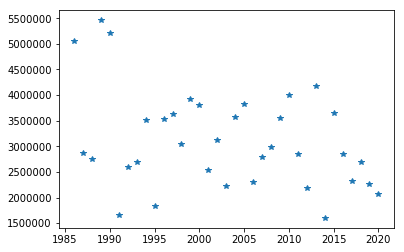

In [47]:
# Afficher un plot

yearly_incidence.plot(style = "*") 

In [48]:
# Afficher les valeurs des fréquences triés
yearly_incidence.sort_values()

2014    1601698
1991    1663610
1995    1828304
2020    2067572
2012    2183912
2003    2234514
2019    2254363
2006    2297262
2017    2322818
2001    2540826
1992    2590314
1993    2699482
2018    2701716
1988    2759663
2007    2786458
2011    2852504
2016    2859019
1987    2867464
2008    2984311
1998    3047298
2002    3115484
1994    3514133
1996    3540251
2009    3558474
2004    3572810
1997    3624129
2015    3647492
2000    3808190
2005    3831409
1999    3914003
2010    3992174
2013    4176872
1986    5050543
1990    5214494
1989    5461328
dtype: int64